## **Context for the Project:**

This project analyzes customer churn data from an e-commerce platform, aiming to understand and predict customer behavior. The dataset includes various features such as `Tenure`, `PreferredLoginDevice`, `CityTier`, `WarehouseToHome`, `PreferredPaymentMode`, `Gender`, `HourSpendOnApp`, `NumberOfDeviceRegistered`, `PreferedOrderCat`, `SatisfactionScore`, `MaritalStatus`, `NumberOfAddress`, `Complain`, `OrderAmountHikeFromlastYear`, `CouponUsed`, `OrderCount`, `DaySinceLastOrder`, and `CashbackAmount`. The dataset also includes a binary `Churn` variable, indicating whether a customer has churned.

The analysis is divided into three key sections: 
1. **Exploratory Data Analysis (EDA)** to identify trends and key factors influencing customer churn.
2. **Machine Learning Model Development** to predict churn using models like Logistic Regression and Random Forest, with an emphasis on optimizing model accuracy.
3. **Clustering using K-Nearest Neighbors (KNN)** to segment customers into distinct groups, facilitating targeted marketing and retention strategies.

## **Importation**


In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
# import missingno as msno
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_validate
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings("ignore")

In [48]:
df = pd.read_excel('D:\Project\Clustering\Final Project\churn_prediction.xlsx')

### **Data snapshot**

In [49]:
df.head()

,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,4,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4,Laptop & Accessory,5,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,3,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


## **EDA**

### **Data information**

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

**Comment:** 
- **CityTier:** Although this column is currently of type int64, it likely represents categorical information. Converting it to object makes it clear to the model that this is a categorical variable, not a numeric one. This conversion helps in correctly encoding or one-hot encoding the data during the preprocessing phase, which is crucial for many machine learning algorithms that don't handle numeric categories natively.
- **Churn:** Similar to CityTier, the Churn column represents a binary category] Converting it to an object type helps to clearly define it as a categorical variable, which is necessary for tasks like classification.
- **CustomerID:** This column is a unique identifier for each customer and does not provide any meaningful information for modeling. Including it in the dataset would not help the model make predictions, and it might even introduce noise. Dropping it ensures that the model focuses only on relevant features.

In [51]:
df['CityTier'] = df['CityTier'].astype('object')
df['Churn'] = df['Churn'].astype('object')
df.drop(['CustomerID'],axis=1, inplace=True)

### **Null inspection**

In [52]:
df.isna().sum()

Churn                            0
Tenure                         264
PreferredLoginDevice             0
CityTier                         0
WarehouseToHome                251
PreferredPaymentMode             0
Gender                           0
HourSpendOnApp                 255
NumberOfDeviceRegistered         0
PreferedOrderCat                 0
SatisfactionScore                0
MaritalStatus                    0
NumberOfAddress                  0
Complain                         0
OrderAmountHikeFromlastYear    265
CouponUsed                     256
OrderCount                     258
DaySinceLastOrder              307
CashbackAmount                   0
dtype: int64

**Comment:**
- There are many null values across the dataset.
- We fill missing values in the dataset using the median of each column to handle missing data effectively. The median is chosen because it’s less sensitive to outliers compared to the mean, making it a robust choice for numeric data. This ensures that the dataset is complete, allowing machine learning models to be trained without errors, while preserving the overall dataset size.

In [53]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        df[i].fillna(df[i].median(),inplace=True)

### Correlation analysis

In [54]:
df_num = df.select_dtypes(include = ['float64', 'int64'])

<Axes: >

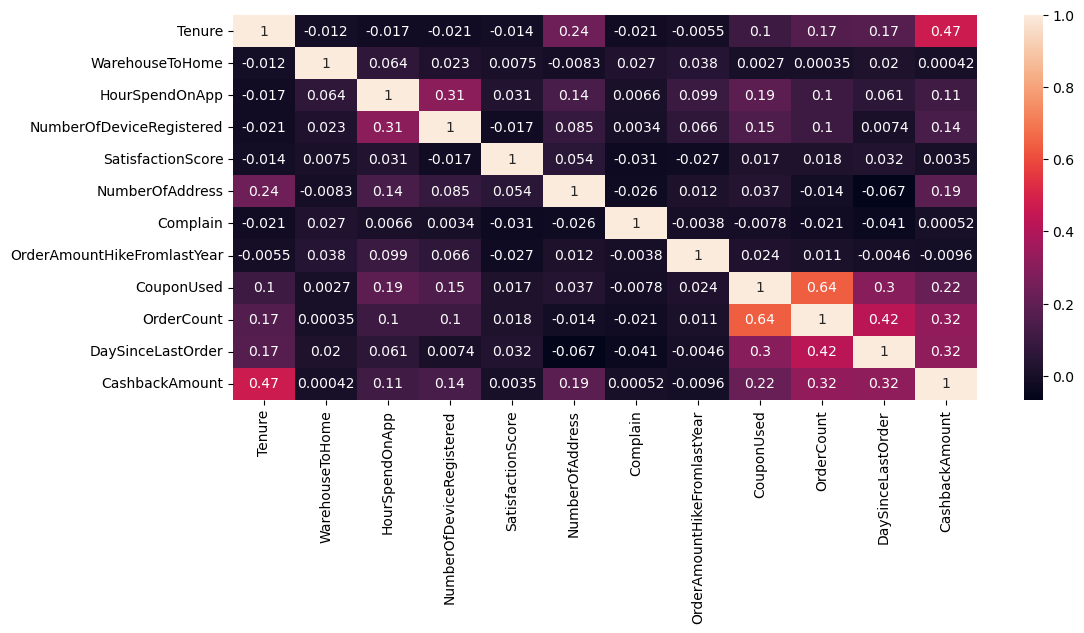

In [55]:
import seaborn as sns
plt.figure(figsize= (12,5))
sns.heatmap(df_num.corr(), annot = True)

**Comment:** The correlation heatmap indicates that there are no concerning sign of multicollinearity

### **Data summary**

**Numerical features**

In [56]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5630.0,10.134103,8.357951,0.0,3.00,9.00,15.0000,61.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,13.00,15.00,18.0000,26.00
CouponUsed,5630.0,1.716874,1.857640,0.0,1.00,1.00,2.0000,16.00
OrderCount,5630.0,2.961812,2.879248,1.0,1.00,2.00,3.0000,16.00


The output provides summary statistics for several numeric variables in a dataset with 5,630 entries:

- **Tenure:** 
  - Average of 10.13 months, with a range from 0 to 61 months.
  - Half of the customers have a tenure of 9 months or less.

- **WarehouseToHome:** 
  - Average distance is 15.57 units, ranging from 5 to 127 units.
  - Most customers are within 14 units of the warehouse.

- **HourSpendOnApp:** 
  - Customers spend an average of 2.93 hours on the app, typically between 2 to 3 hours.

- **NumberOfDeviceRegistered:** 
  - On average, customers have 3.69 devices registered, usually between 3 and 4.

- **SatisfactionScore:** 
  - The average satisfaction score is 3.07, with most scores between 2 and 4.

- **NumberOfAddress:** 
  - Customers have an average of 4.21 addresses, with a wide range from 1 to 22.

- **Complain:** 
  - Around 28.5% of customers have made a complaint.

- **OrderAmountHikeFromLastYear:** 
  - The average order amount hike is 15.67%, typically between 13% and 18%.

- **CouponUsed:** 
  - Customers use an average of 1.72 coupons, with a range from 0 to 16.

- **OrderCount:** 
  - The average order count is 2.96, with most customers placing between 1 and 3 orders.

- **DaySinceLastOrder:** 
  - The average days since the last order is 4.46, with a broad range from 0 to 46 days.

- **CashbackAmount:** 
  - The average cashback amount is 177.22 units, with most customers receiving between 145.77 and 196.39 units.

**Catgorical features**

In [57]:
df.describe(include = 'object')

,Churn,PreferredLoginDevice,CityTier,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus
count,5630,5630,5630,5630,5630,5630,5630
unique,2,3,3,7,2,6,3
top,0,Mobile Phone,1,Debit Card,Male,Laptop & Accessory,Married
freq,4682,2765,3666,2314,3384,2050,2986


**Comment:**

- **Churn:** 
  - There are 2 unique values (0 and 1), with the majority of customers not churning (4,682 instances).

- **PreferredLoginDevice:** 
  - There are 3 unique devices, with "Mobile Phone" being the most common (used by 2,765 customers).

- **CityTier:** 
  - There are 3 unique city tiers, with Tier 1 being the most frequent (3,666 customers).

- **PreferredPaymentMode:** 
  - There are 7 unique payment modes, with "Debit Card" being the most popular (used by 2,314 customers).

- **Gender:** 
  - There are 2 unique genders, with "Male" being more common (3,384 customers).

- **PreferedOrderCat (Preferred Order Category):** 
  - There are 6 unique order categories, with "Laptop & Accessory" being the most preferred (chosen by 2,050 customers).

- **MaritalStatus:** 
  - There are 3 unique marital statuses, with "Married" being the most common (2,986 customers).

**Duplication inspection**

In [58]:
df.duplicated().sum()

558

**Comment:** Too many duplicates that may be considered redundant records thus i removed it

In [59]:
df.drop_duplicates(inplace=True)

In [60]:
count_col = []
hist_col = []
for column in df.columns:
    unique_value = df[column].nunique()
    if unique_value <= 20:
        count_col.append(column)
    else:
        hist_col.append(column)

**Distribution Analysis of Key Features by Churn Status**

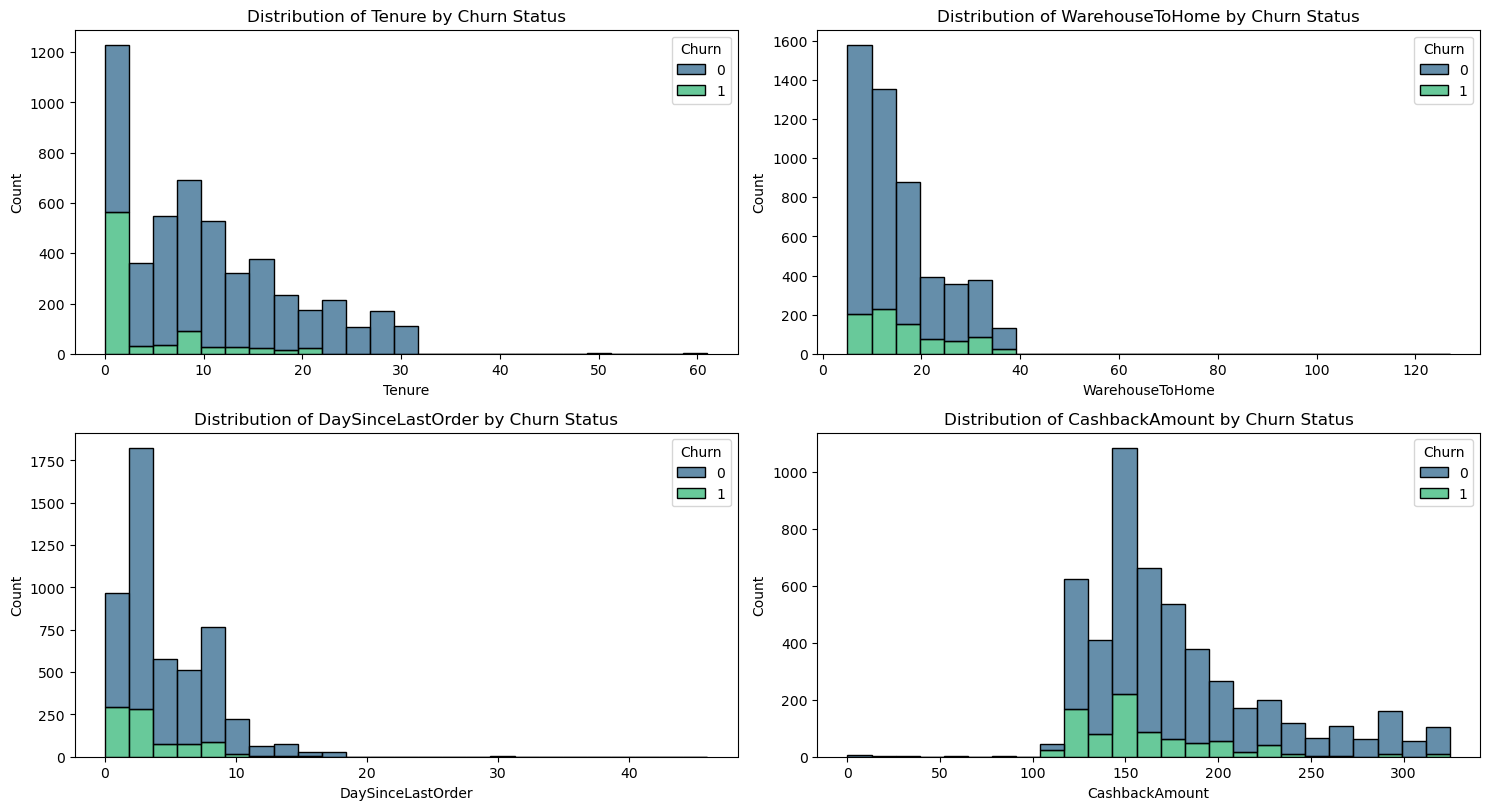

In [61]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in hist_col:
    plt.subplot(10,2,plot_num)
    sns.histplot(data=df, x=col,bins=25, hue='Churn', multiple='stack', palette='viridis')
    plt.title(f'Distribution of {col} by Churn Status')
    plt.xlabel(col)
    plt.ylabel('Count')
    plot_num += 1
    plt.tight_layout()
# Tạo một figure với số lượng subplots tương ứng với số biến

**Summary:**
This analysis visualizes the distribution of four key features—**Tenure**, **WarehouseToHome**, **DaySinceLastOrder**, and **CashbackAmount**—segmented by **Churn Status** (0 for non-churners, 1 for churners).
1. **Tenure:**
   - **Observation:** Customers with lower tenure (especially around 0-5 months) have a higher churn rate. As tenure increases, the churn rate decreases significantly.
   - **Insight:** Longer-tenured customers are more likely to remain loyal, while newer customers are at higher risk of churn.

2. **WarehouseToHome:**
   - **Observation:** Customers with shorter distances between the warehouse and home tend to churn more. However, churn decreases as the distance increases up to a point, after which the number of customers drops off overall.
   - **Insight:** Proximity to the warehouse might influence customer retention, though extreme distances do not seem to be associated with higher churn.

3. **DaySinceLastOrder:**
   - **Observation:** Customers who haven't placed an order for a long time are more likely to churn. The churn rate is particularly high for those with very few days since their last order.
   - **Insight:** Recency of orders is a strong indicator of customer retention, suggesting that re-engaging customers who haven't ordered recently could reduce churn.

4. **CashbackAmount:**
   - **Observation:** Higher cashback amounts appear to be associated with lower churn rates. Customers receiving around 150 units of cashback seem to churn less frequently.
   - **Insight:** Cashback incentives may help in reducing churn, especially if targeted towards customers in risk categories.

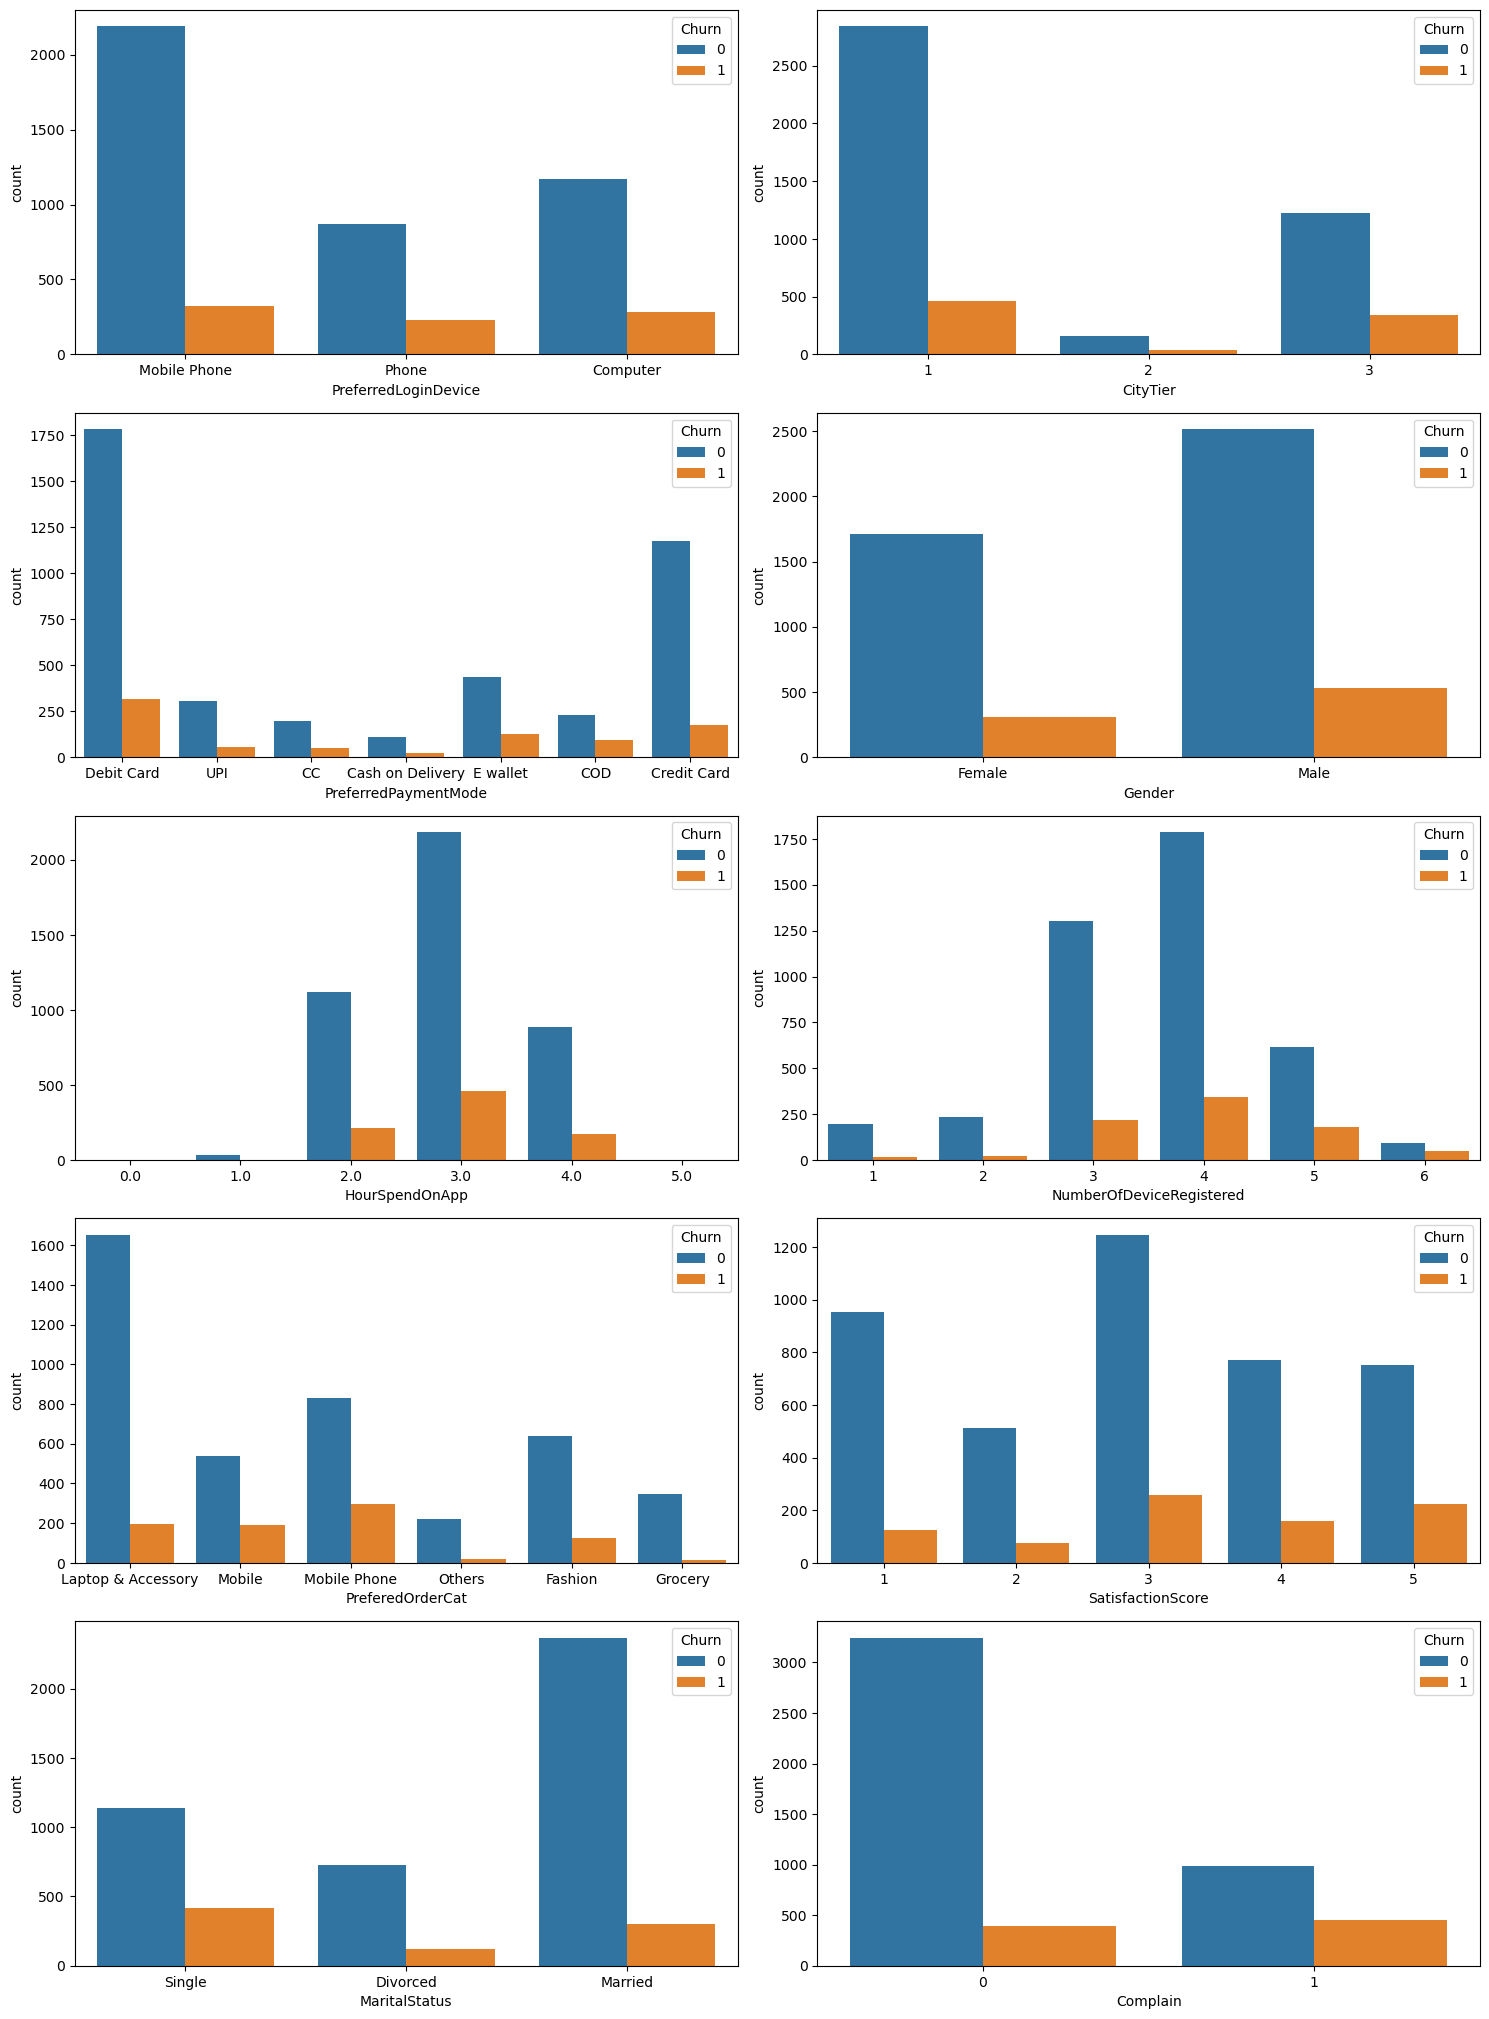

In [62]:
plt.figure(figsize=(15,40))
plot_num = 1
for col in count_col:
    if df[col].nunique() <= 8 and col != "Churn":
        plt.subplot(10,2,plot_num)
        sns.countplot(data=df, x=col, hue="Churn")
        plot_num += 1
        plt.tight_layout()

### **Summary:**
The bar plots provide insights into how different categories within these features are associated with customer churn.

1. **PreferredLoginDevice:**
   - **Observation:** The majority of customers use Mobile Phones to log in, with a relatively lower churn rate compared to those using Computers or iPhones.
   - **Insight:** Mobile phone users are more stable, whereas other devices might be associated with higher churn rates.

2. **CityTier:**
   - **Observation:** Customers from CityTier 1 have the highest number of users, but CityTier 2 and 3 show a higher proportion of churners relative to their user base.
   - **Insight:** Customers in less urbanized areas (CityTier 2 and 3) may have higher churn rates.

3. **PreferredPaymentMode:**
   - **Observation:** Debit Card is the most common payment method, with a balanced churn rate. Cash on Delivery (COD) and Credit Card users exhibit slightly higher churn rates.
   - **Insight:** Payment mode preference might influence churn, with COD and credit-based payments indicating a potential risk for churn.

4. **Gender:**
   - **Observation:** Males have a higher representation, but the churn rate between genders seems relatively balanced.
   - **Insight:** Gender alone may not be a strong predictor of churn.

5. **HourSpendOnApp:**
   - **Observation:** Most customers spend 2-3 hours on the app, with churners spread across different usage levels.
   - **Insight:** There is no clear pattern indicating that higher or lower app usage alone drives churn.

6. **NumberOfDeviceRegistered:**
   - **Observation:** Customers with 3-4 devices registered show a higher count, but those with fewer devices (1-2) tend to churn more.
   - **Insight:** A lower number of registered devices could indicate a higher risk of churn.

7. **PreferedOrderCat:**
   - **Observation:** Laptops & Accessories are the most preferred category, with churn rates higher among users who prefer categories like "Others" and "Fashion."
   - **Insight:** Product category preference may have a link to churn, with non-tech items indicating higher churn.

8. **SatisfactionScore:**
   - **Observation:** Customers with a Satisfaction Score of 3 show the highest count, with lower scores (1-2) associated with higher churn.
   - **Insight:** Lower satisfaction scores are strongly correlated with higher churn rates.

9. **MaritalStatus:**
   - **Observation:** Married individuals are the largest group, with lower churn rates. Single and Divorced customers show a higher churn proportion.
   - **Insight:** Marital status could influence churn, with single or divorced individuals being more prone to leaving.

10. **Complain:**
    - **Observation:** Most customers do not have complaints, but those who do are more likely to churn.
    - **Insight:** Complaints are a strong indicator of churn risk, highlighting the need for better customer service to reduce churn.
- In these categorical columns, there are values that are semantically duplicated. For example:

   -  `{Phone: Mobile Phone}`: Both "Phone" and "Mobile Phone" refer to the same device type.
   - `{CC: Credit Card}`: Both "CC" and "Credit Card" refer to the same payment method.

These duplicates should be merged or standardized to a single representation to avoid redundancy and improve the consistency of the analysis. Thus, I standardized it and the unique values of categorical features after standardization is as follows:

In [63]:
#Replace the same meaning values:
df['PreferredLoginDevice'] = df['PreferredLoginDevice'].replace({'Mobile Phone':'Phone'})
df['PreferredPaymentMode'] = df['PreferredPaymentMode'].replace({'CC':'Credit Card','COD':'Cash on Delivery'})
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile Phone':'Phone'})

#Recheck:
list_obj = df.loc[:, df.dtypes == object].columns.tolist()
for j in list_obj:
  print(f"Unique values of {j}: {df[j].unique()}")

Unique values of Churn: [1 0]
Unique values of PreferredLoginDevice: ['Phone' 'Computer']
Unique values of CityTier: [3 1 2]
Unique values of PreferredPaymentMode: ['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet']
Unique values of Gender: ['Female' 'Male']
Unique values of PreferedOrderCat: ['Laptop & Accessory' 'Mobile' 'Phone' 'Others' 'Fashion' 'Grocery']
Unique values of MaritalStatus: ['Single' 'Divorced' 'Married']


### **Outliers inspection**

Text(0, 0.5, 'Values')

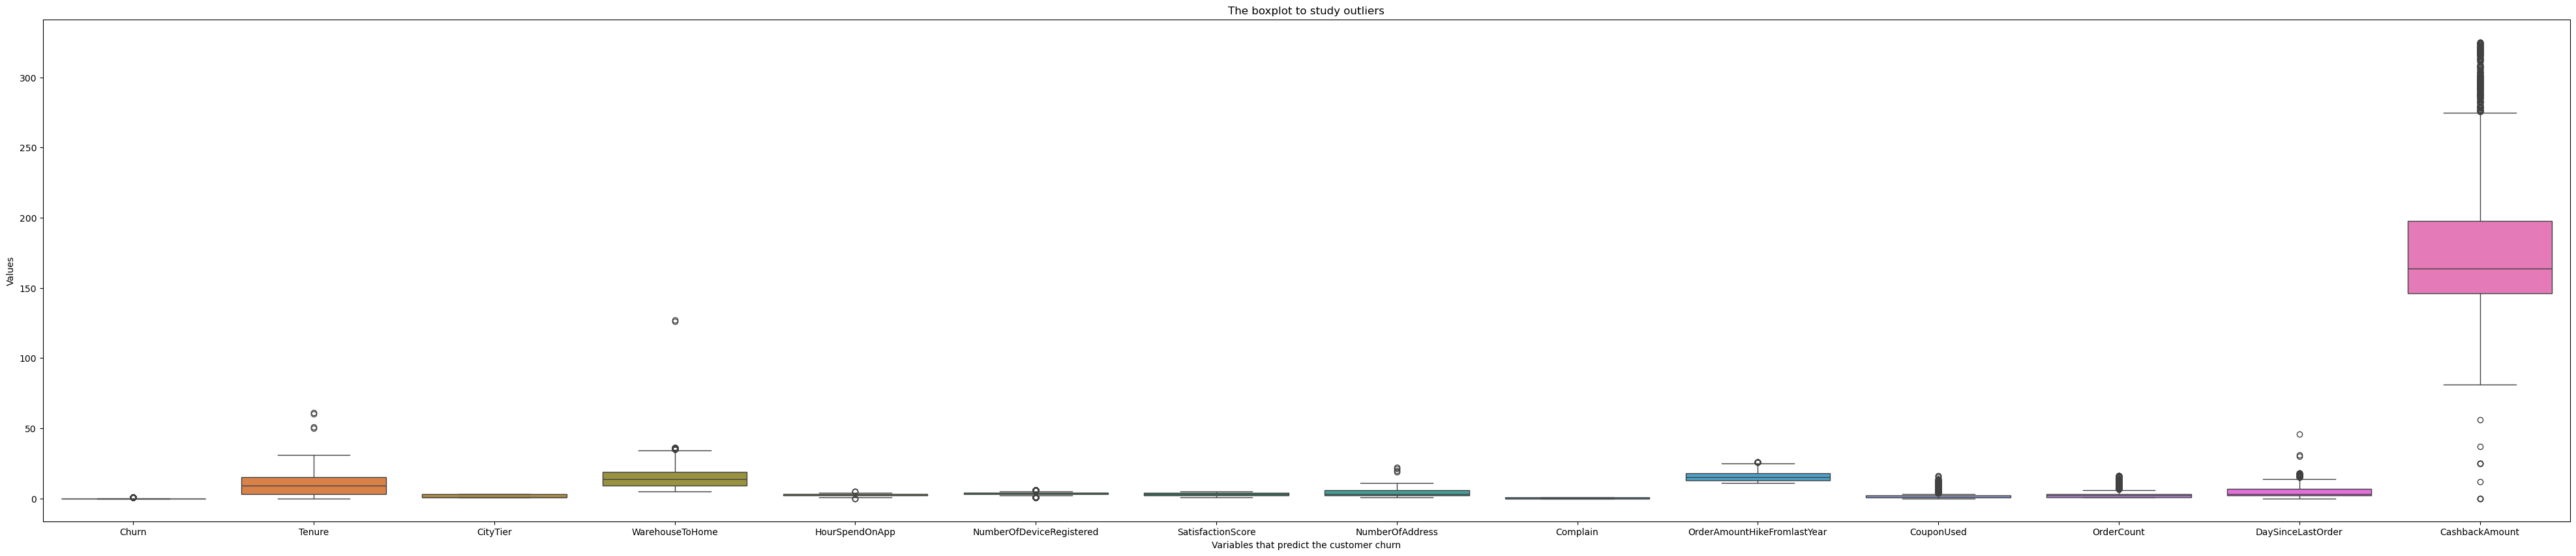

In [64]:
plt.figure(figsize=(50,10))
sns.boxplot(data=df)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

**Comment:** CashbackAmout has a considerable number of outliers thus I carried out inspection on this feature:

<Axes: xlabel='CashbackAmount'>

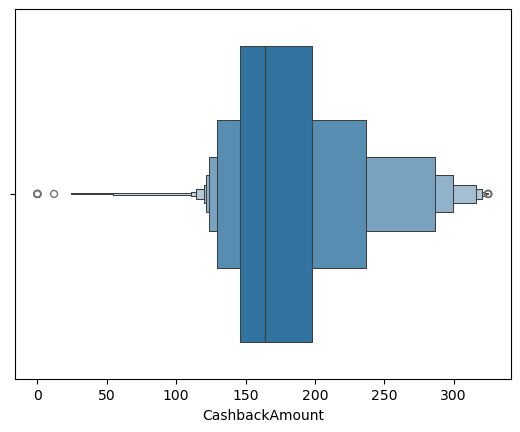

In [65]:
sns.boxenplot(data=df,x="CashbackAmount")

In [66]:
Q1 = df['CashbackAmount'].quantile(0.25)
Q3 = df['CashbackAmount'].quantile(0.75)
IQR = Q3 - Q1

outliers = df[(df['CashbackAmount'] < (Q1 - 1.5 * IQR)) | (df['CashbackAmount'] > (Q3 + 1.5 * IQR))]
outliers.describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,386.0,20.168394,7.105888,0.0,16.00,20.000,24.00,61.00
WarehouseToHome,386.0,13.445596,7.466524,5.0,9.00,10.000,16.00,36.00
HourSpendOnApp,386.0,2.961140,0.706955,1.0,2.00,3.000,3.00,4.00
NumberOfDeviceRegistered,386.0,3.841969,0.922110,1.0,3.00,4.000,4.00,6.00
SatisfactionScore,386.0,3.090674,1.361651,1.0,2.00,3.000,4.00,5.00
NumberOfAddress,386.0,4.818653,2.473394,1.0,3.00,5.000,6.00,11.00
Complain,386.0,0.240933,0.428205,0.0,0.00,0.000,0.00,1.00
OrderAmountHikeFromlastYear,386.0,15.132124,2.137034,11.0,15.00,15.000,15.00,26.00
CouponUsed,386.0,2.538860,2.727406,0.0,1.00,1.000,3.00,16.00
OrderCount,386.0,5.401554,4.715479,1.0,2.00,3.000,8.00,16.00


**Non-outlier data description**

In [67]:
df[~(df['CashbackAmount'] < (Q1 - 1.5 * IQR)) | (df['CashbackAmount'] > (Q3 + 1.5 * IQR))].describe().T

,count,mean,std,min,25%,50%,75%,max
Tenure,5061.0,10.154317,8.391207,0.0,3.00,9.00,15.00,61.00
WarehouseToHome,5061.0,15.467101,8.409455,5.0,9.00,14.00,19.00,127.00
HourSpendOnApp,5061.0,2.932622,0.707390,0.0,2.00,3.00,3.00,5.00
NumberOfDeviceRegistered,5061.0,3.685635,1.029874,1.0,3.00,4.00,4.00,6.00
SatisfactionScore,5061.0,3.027267,1.383859,1.0,2.00,3.00,4.00,5.00
NumberOfAddress,5061.0,4.197589,2.579733,1.0,2.00,3.00,6.00,22.00
Complain,5061.0,0.282750,0.450381,0.0,0.00,0.00,1.00,1.00
OrderAmountHikeFromlastYear,5061.0,15.672199,3.589928,11.0,13.00,15.00,18.00,26.00
CouponUsed,5061.0,1.769018,1.905421,0.0,1.00,1.00,2.00,16.00
OrderCount,5061.0,3.035764,2.923684,1.0,1.00,2.00,3.00,16.00


**Comment:** These outliers might be high-volume or frequent buyers who engage heavily with the promotions and discounts, which could result in higher cashback amounts. They might be more engaged or loyal customers, or they could be leveraging promotions more effectively.

### **Important feature analysis**

Using Random Forest model can identify important features that affect the target feature: Churn. I split the data and one hot encode independent variables and receive:

In [68]:
from sklearn.impute import SimpleImputer
import pandas as pd

X_q2 = df.drop(["Churn"], axis=1)
y_q2 = df["Churn"]
X_q2 = pd.get_dummies(X_q2, dtype=int)

# Kiểm tra kết quả
X_q2.head()


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3,2,9,1,11.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,9.0,8.0,3.0,4,3,7,1,15.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
2,9.0,30.0,2.0,4,3,6,1,14.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
3,0.0,15.0,2.0,4,5,8,0,23.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
4,0.0,12.0,3.0,3,5,3,0,11.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,1


In [69]:
X_q2.columns

Index(['Tenure', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount', 'PreferredLoginDevice_Computer',
       'PreferredLoginDevice_Phone', 'CityTier_1', 'CityTier_2', 'CityTier_3',
       'PreferredPaymentMode_Cash on Delivery',
       'PreferredPaymentMode_Credit Card', 'PreferredPaymentMode_Debit Card',
       'PreferredPaymentMode_E wallet', 'PreferredPaymentMode_UPI',
       'Gender_Female', 'Gender_Male', 'PreferedOrderCat_Fashion',
       'PreferedOrderCat_Grocery', 'PreferedOrderCat_Laptop & Accessory',
       'PreferedOrderCat_Mobile', 'PreferedOrderCat_Others',
       'PreferedOrderCat_Phone', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single'],
      dtype='object')

**Data standardization** (by scaling)

In [70]:
scaler = StandardScaler()
X_q2_scaled = scaler.fit_transform(X_q2)
X_q2 = pd.DataFrame(X_q2_scaled, columns=X_q2.columns)
X_q2

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,-0.733224,-1.126368,0.095341,-0.666205,-0.742222,1.863210,1.592784,-1.302437,-0.404020,-0.696376,...,-1.227163,-0.420798,-0.278056,1.321391,-0.408718,-0.223838,-0.535403,-0.44806,-1.055146,1.506002
1,-0.137588,-0.888607,0.095341,0.305049,-0.019937,1.087681,1.592784,-0.188494,-0.926774,-0.696376,...,0.814888,-0.420798,-0.278056,-0.756778,2.446676,-0.223838,-0.535403,-0.44806,-1.055146,1.506002
2,-0.137588,1.726773,-1.318610,0.305049,-0.019937,0.699917,1.592784,-0.466980,-0.926774,-0.696376,...,0.814888,-0.420798,-0.278056,-0.756778,2.446676,-0.223838,-0.535403,-0.44806,-1.055146,1.506002
3,-1.209733,-0.056440,-1.318610,0.305049,1.424634,1.475445,-0.627832,2.039391,-0.926774,-0.696376,...,0.814888,-0.420798,-0.278056,1.321391,-0.408718,-0.223838,-0.535403,-0.44806,-1.055146,1.506002
4,-1.209733,-0.413083,0.095341,-0.666205,1.424634,-0.463375,-0.627832,-1.302437,-0.404020,-0.696376,...,0.814888,-0.420798,-0.278056,-0.756778,2.446676,-0.223838,-0.535403,-0.44806,-1.055146,1.506002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5067,-0.614097,-0.413083,1.509293,0.305049,1.424634,-0.851139,-0.627832,1.203934,0.118733,-0.355316,...,0.814888,-0.420798,-0.278056,1.321391,-0.408718,-0.223838,-0.535403,-0.44806,-1.055146,1.506002
5068,-1.090606,-0.413083,-1.318610,1.276303,-0.019937,-0.851139,-0.627832,0.925449,0.118733,-0.355316,...,-1.227163,-0.420798,-0.278056,-0.756778,-0.408718,-0.223838,1.867751,-0.44806,-1.055146,1.506002
5069,0.338921,-0.294202,0.095341,1.276303,1.424634,0.699917,-0.627832,0.089992,-0.404020,-0.355316,...,0.814888,2.376435,-0.278056,-0.756778,-0.408718,-0.223838,-0.535403,-0.44806,0.947736,-0.664010
5070,-1.090606,-0.531964,0.095341,-1.637459,0.702348,-0.463375,1.592784,1.482420,-0.404020,-0.355316,...,0.814888,-0.420798,-0.278056,1.321391,-0.408718,-0.223838,-0.535403,-0.44806,0.947736,-0.664010


**Feature Importance Analysis**

In [71]:
from sklearn.ensemble import RandomForestClassifier

classifier_rf = RandomForestClassifier(random_state=42, n_estimators=100)

classifier_rf.fit(X_q2, y_q2.astype(int))

RandomForestClassifier(random_state=42)

In [72]:
# Extract feature importances
feature_rf_importances = classifier_rf.feature_importances_
# Create a DataFrame with feature names and their importances
imp_rf_df = pd.DataFrame({
    "Features": X_q2.columns,
    "Importance (Random Forest)": feature_rf_importances
})
# Sort by feature importance in descending order
imp_rf_df_sorted = imp_rf_df.sort_values(by="Importance (Random Forest)", ascending=False)
imp_rf_df_sorted

,Features,Importance (Random Forest)
0,Tenure,0.205138
11,CashbackAmount,0.093015
1,WarehouseToHome,0.068858
6,Complain,0.063661
5,NumberOfAddress,0.062786
10,DaySinceLastOrder,0.058157
7,OrderAmountHikeFromlastYear,0.052950
4,SatisfactionScore,0.045855
3,NumberOfDeviceRegistered,0.035703
9,OrderCount,0.033067


**Comment:** In the Random Forest model, the most important features for predicting outcomes are `Tenure` with an importance of 0.2059, and `CashbackAmount` with an importance of 0.0926. Other notable features include `WarehouseToHome`, `NumberOfAddress`, and `DaySinceLastOrder`, while features such as `PreferredPaymentMode_UPI` and `PreferedOrderCat_Others` have relatively low importance.

**Distribution of important features by Churn Status**

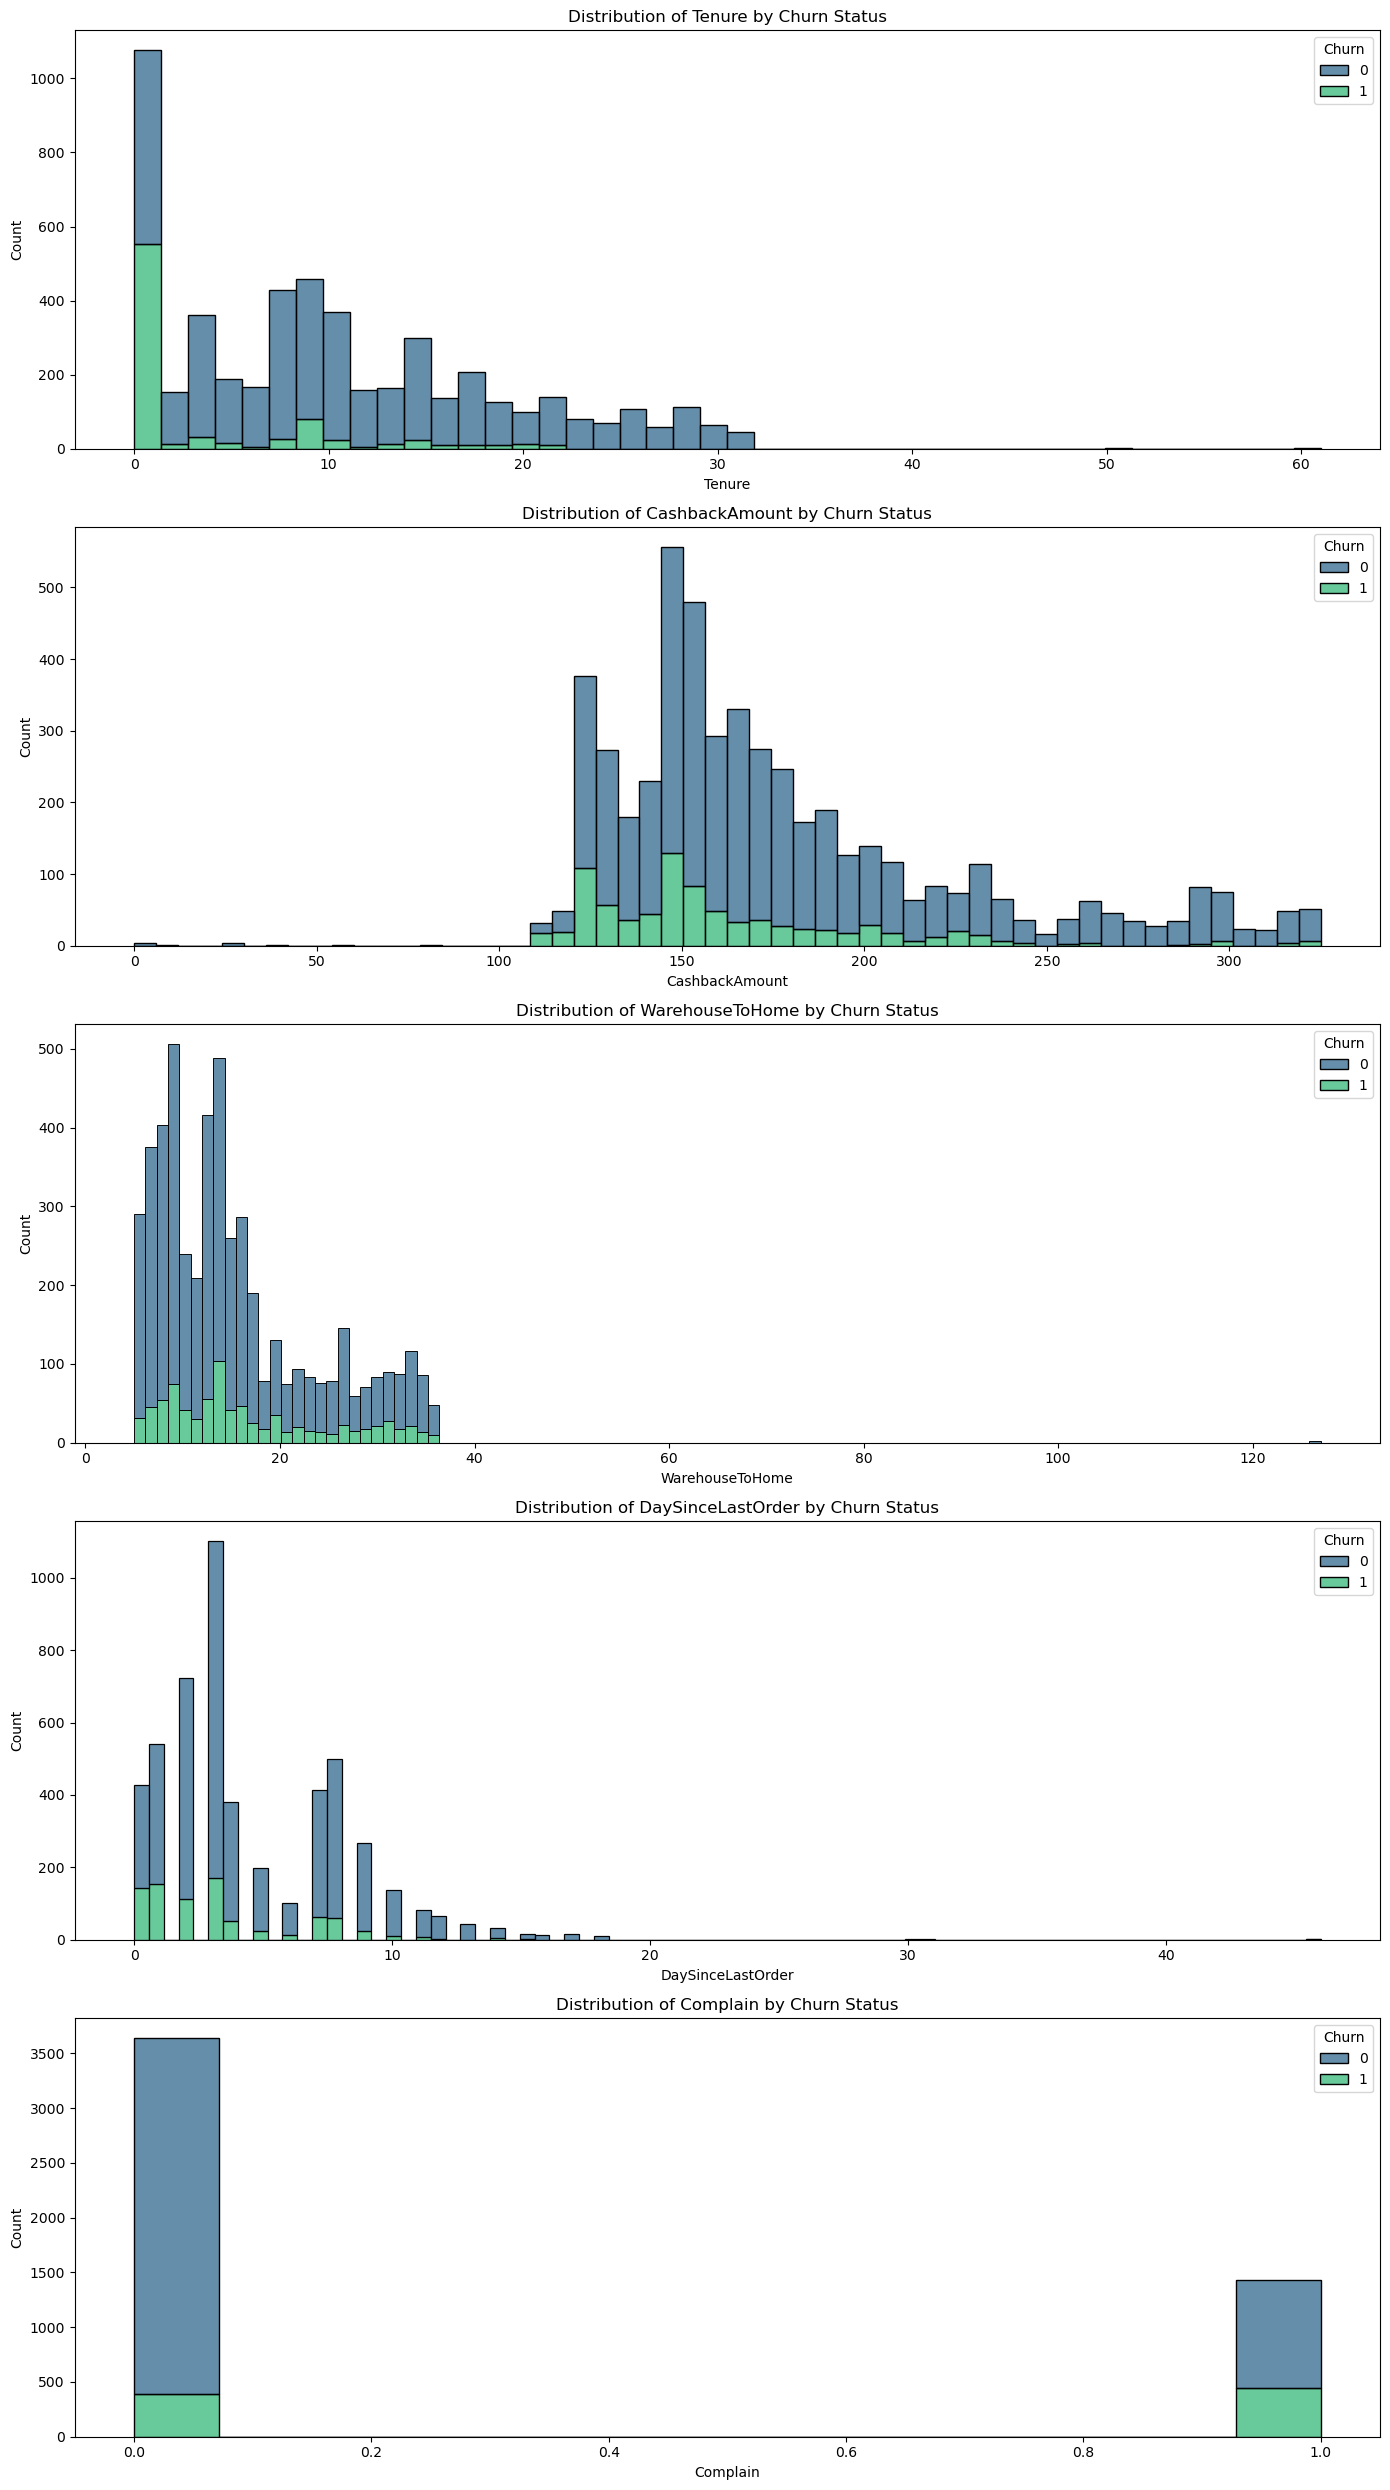

In [73]:
# Danh sách các biến bạn muốn vẽ histogram
variables = ['Tenure', 'CashbackAmount', 'WarehouseToHome', 'DaySinceLastOrder', 'Complain']

# Tạo một figure với số lượng subplots tương ứng với số biến
num_vars = len(variables)
plt.figure(figsize=(14, 5 * num_vars))

for i, var in enumerate(variables):
    plt.subplot(num_vars, 1, i + 1)
    sns.histplot(data=df, x=var, hue='Churn', multiple='stack', palette='viridis')
    plt.title(f'Distribution of {var} by Churn Status')
    plt.xlabel(var)
    plt.ylabel('Count')

plt.tight_layout()
plt.show()


**Insight**
- **Tenure:** Long-term customers may have more positive experiences: They might have had many positive interactions with the service, leading to higher loyalty. New customers may not have had enough time to experience the service and may be more likely to churn if they encounter issues.
  + The company could offer special incentives or rewards based on how long a customer has been using the service. For example, discounts or gifts for customers who have used the service for over a year.
  + Alternatively, enhancing communication with long-term customers to ensure they feel valued and appreciated could be beneficial.

- **CashbackAmount:** If customers receive a high cashback amount, it may reduce the risk of churn as they might feel better taken care of and have a reason to continue shopping.
  + The company could consider improving the cashback program to encourage continued shopping. For example, increasing cashback promotions during holidays or special events.
  + Simultaneously, monitoring the impact of cashback programs on customer behavior could help optimize promotional strategies.

## **Build the Machine Learning model for predicting churned users (fine tuning)**

In [74]:
from sklearn.impute import SimpleImputer
import pandas as pd

X = df.drop(["Churn"], axis=1)
y = df["Churn"].astype(int)

X = pd.get_dummies(X, dtype=int)

# Kiểm tra kết quả
X.head()


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,Gender_Male,PreferedOrderCat_Fashion,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,4.0,6.0,3.0,3,2,9,1,11.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
1,9.0,8.0,3.0,4,3,7,1,15.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
2,9.0,30.0,2.0,4,3,6,1,14.0,0.0,1.0,...,1,0,0,0,1,0,0,0,0,1
3,0.0,15.0,2.0,4,5,8,0,23.0,0.0,1.0,...,1,0,0,1,0,0,0,0,0,1
4,0.0,12.0,3.0,3,5,3,0,11.0,1.0,1.0,...,1,0,0,0,1,0,0,0,0,1


In [75]:
from sklearn.model_selection import train_test_split

# Chia dữ liệu thành train và test (70% train, 30% test)
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)

# Chia tiếp dữ liệu tạm thời thành validate và test (50% của 30% còn lại)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.3333, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)
X_train_scaled_df = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)
X_val_scaled_df = pd.DataFrame(X_val_scaled, columns=X_val.columns)

**Model selection:** We choose 3 models: Logistic Regression, KNN, Random Forest. Logistic Regression was chosen for its interpretability and efficiency in binary classification tasks, while KNN offers simplicity and flexibility in handling non-linear relationships. Random Forest was selected for its robustness and ability to handle complex interactions and feature importance. The result was interpreted using cross-validation with accuracy and F1 score metrics.

In [76]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(random_state=42, n_estimators=100)
}
results = {}

for name, model in models.items():
    kf = KFold(n_splits=6, random_state=42, shuffle=True)
    # Chọn các chỉ số đánh giá mong muốn
    scoring = ['accuracy', 'f1']
    cv_results = cross_validate(model, X_train_scaled_df, y_train, cv= kf, scoring=scoring)
    results[name] = cv_results
# Tạo danh sách để lưu trữ kết quả trung bình
mean_results = []

# Tính trung bình cho từng metric của từng model
for model_name, metrics in results.items():
    mean_metrics = {metric: pd.Series(values).mean() for metric, values in metrics.items()}
    mean_metrics['Model'] = model_name
    mean_results.append(mean_metrics)
mean_results_df = pd.DataFrame(mean_results)
mean_results_df

,fit_time,score_time,test_accuracy,test_f1,Model
0,0.019565,0.012040,0.891265,0.607757,Logistic Regression
1,0.011155,0.296642,0.874370,0.491773,KNN
2,0.752295,0.026061,0.934928,0.771762,Random Forest


**Model Selected:** The Random Forest model is selected as it demonstrates superior performance compared to the other models

**Parameter Tuning** (using validation dataset)

In [77]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd

# Tạo mô hình Random Forest
rf = RandomForestClassifier(random_state=42)

# Định nghĩa lưới tham số cho tìm kiếm
param_grid = {
    'n_estimators': [50, 100, 150, 200, 250],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 10, 20]
}


# Khởi tạo GridSearchCV
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid,
                           scoring='accuracy', cv=3, n_jobs=-1, verbose=2)

# Thực hiện tìm kiếm tham số
grid_search.fit(X_train_scaled_df, y_train.astype(int))

# Lấy các tham số tối ưu và điểm số tốt nhất
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:")
print(best_params)
print(f"Best cross-validation score: {best_score:.4f}")

# Đánh giá mô hình với tập validation
best_rf = grid_search.best_estimator_
val_score = best_rf.score(X_val_scaled_df, y_val)
print(f"Validation score with best parameters: {val_score:.4f}")


Fitting 3 folds for each of 135 candidates, totalling 405 fits
Best parameters found:
{'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 250}
Best cross-validation score: 0.9321
Validation score with best parameters: 0.9497


**Classification report** (using test set)

In [78]:
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Use the best model found by GridSearchCV
best_rf = grid_search.best_estimator_

# Predict on the test set
y_test_pred = best_rf.predict(X_test_scaled_df)

# Calculate accuracy
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Test accuracy: {test_accuracy:.4f}")

# Calculate F1 score
test_f1_score = f1_score(y_test, y_test_pred, average='weighted')
print(f"Test F1 score: {test_f1_score:.4f}")

# Classification report
print("Classification report on test set:")
print(classification_report(y_test, y_test_pred))

Test accuracy: 0.9528
Test F1 score: 0.9499
Classification report on test set:
              precision    recall  f1-score   support

           0       0.95      1.00      0.97       422
           1       0.98      0.73      0.84        86

    accuracy                           0.95       508
   macro avg       0.97      0.87      0.91       508
weighted avg       0.95      0.95      0.95       508



## **Clustering**

Using K-Means clustering to determine the optimal number of clusters for a dataset of churned customers. 
Evaluates clustering performance using two methods: the elbow method and silhouette scores.

- Elbow Method: Inertia (the sum of squared distances from each point to its assigned cluster center) the smaller the inertia, the more put together or the more coherent the data is.

- Silhouette Scores: measures how similar each sample is to its own cluster compared to other clusters. Higher scores indicate better-defined clusters.

In [92]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

# Filter the dataset to include only churned customers
churned_customers_df = df[df['Churn'] == 1]

# Drop the 'Churn' column as it is not needed for clustering
churned_customers_features = churned_customers_df.drop(columns=['Churn'])



# Chuyển đổi các cột phân loại thành biến giả (one-hot encoding)
churned_customers_features = pd.get_dummies(churned_customers_features, dtype=int,drop_first=True)
churned_customers_features_scaled = scaler.fit_transform(churned_customers_features)
churned_customers_features_df = pd.DataFrame(churned_customers_features_scaled, columns=churned_customers_features.columns)
churned_customers_features_df.head()


,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Married,MaritalStatus_Single
0,0.015650,-1.284200,0.068880,-0.941359,-0.994066,1.620370,0.934372,-1.211230,-0.401895,-0.672632,...,-0.423702,-0.267091,-1.312129,-0.139262,1.826212,-0.538403,-0.152034,-0.742739,-0.74853,1.013166
1,0.917112,-1.045021,0.068880,0.043321,-0.252923,0.900871,0.934372,-0.139537,-0.910922,-0.672632,...,-0.423702,3.744043,0.762120,-0.139262,-0.547581,1.857346,-0.152034,-0.742739,-0.74853,1.013166
2,0.917112,1.585947,-1.416462,0.043321,-0.252923,0.541122,0.934372,-0.407460,-0.910922,-0.672632,...,-0.423702,-0.267091,0.762120,-0.139262,-0.547581,1.857346,-0.152034,-0.742739,-0.74853,1.013166
3,-0.705520,-0.207895,-1.416462,0.043321,1.229364,1.260621,-1.070237,2.003849,-0.910922,-0.672632,...,-0.423702,-0.267091,0.762120,-0.139262,1.826212,-0.538403,-0.152034,-0.742739,-0.74853,1.013166
4,-0.705520,-0.566663,0.068880,-0.941359,1.229364,-0.538127,-1.070237,-1.211230,-0.401895,-0.672632,...,-0.423702,-0.267091,0.762120,-0.139262,-0.547581,1.857346,-0.152034,-0.742739,-0.74853,1.013166


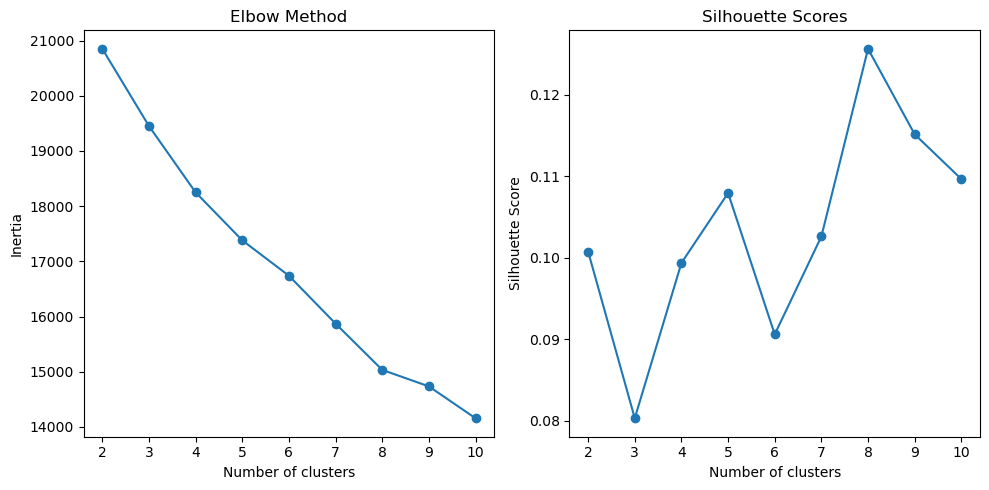

In [93]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Determine the optimal number of clusters using the elbow method
inertia = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(churned_customers_features_df)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(churned_customers_features_df, kmeans.labels_))

# Plot the elbow method graph
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

# Plot silhouette scores
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_scores, marker='o')
plt.title('Silhouette Scores')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')

plt.tight_layout()
plt.show()


- When applying Elbow method, we see 8 is the optimal number of clusters.

In [100]:
# Fit KMeans with the optimal number of clusters
optimal_k = 8
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(churned_customers_features_df)

# Get the cluster labels
cluster_labels = kmeans.labels_
# Add cluster labels to the original DataFrame
churned_customers_features['Cluster'] = cluster_labels

### EDA on clusters to identify patterns

In [104]:
# Analyze cluster characteristics
cluster_summary = churned_customers_features.groupby('Cluster').mean()
cluster_summary

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Married,MaritalStatus_Single
Cluster,,,,,,,,,,,,,,,,,,,,,
0,13.789474,10.631579,2.894737,4.263158,3.473684,4.789474,0.578947,15.052632,4.000000,8.052632,...,0.368421,0.000000,0.421053,0.000000,0.000000,0.000000,1.0,0.000000,0.315789,0.368421
1,7.647059,16.235294,2.529412,3.352941,3.117647,6.529412,0.470588,13.235294,4.352941,5.823529,...,0.176471,0.000000,0.882353,0.941176,0.000000,0.000000,0.0,0.000000,0.529412,0.470588
2,5.754237,17.186441,3.135593,4.211864,2.898305,5.838983,0.491525,14.966102,2.737288,4.186441,...,0.000000,0.000000,0.694915,0.000000,0.237288,0.008475,0.0,0.406780,0.779661,0.033898
3,4.217687,18.993197,2.925170,3.857143,3.517007,5.156463,0.482993,16.591837,1.761905,3.265306,...,0.000000,0.095238,0.659864,0.000000,0.775510,0.006803,0.0,0.000000,0.278912,0.523810
4,3.757962,14.605096,2.554140,3.496815,3.350318,3.828025,0.636943,15.121019,0.891720,1.764331,...,0.000000,0.057325,0.630573,0.000000,0.000000,1.000000,0.0,0.000000,0.356688,0.509554
5,2.445887,15.653680,3.229437,4.199134,3.419913,3.987013,0.506494,16.004329,1.744589,2.627706,...,0.000000,0.064935,0.610390,0.000000,0.000000,0.000000,0.0,0.913420,0.138528,0.731602
6,3.008475,19.211864,2.855932,3.991525,3.288136,3.805085,0.593220,14.923729,1.533898,2.432203,...,1.000000,0.000000,0.593220,0.000000,0.440678,0.144068,0.0,0.211864,0.338983,0.559322
7,2.647059,17.735294,3.000000,3.970588,3.764706,4.735294,0.411765,14.852941,1.441176,1.970588,...,0.000000,0.529412,0.588235,0.000000,0.000000,0.382353,0.0,0.441176,0.764706,0.117647


In [109]:
churned_customers_features.describe()

,Tenure,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,...,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile,PreferedOrderCat_Others,PreferedOrderCat_Phone,MaritalStatus_Married,MaritalStatus_Single,Cluster
count,841.000000,841.000000,841.000000,841.000000,841.00000,841.000000,841.000000,841.000000,841.000000,841.000000,...,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000,841.000000
mean,3.913199,16.738407,2.953627,3.956005,3.34126,4.495838,0.533888,15.520809,1.789536,2.929845,...,0.066587,0.632580,0.019025,0.230678,0.224732,0.022592,0.355529,0.359096,0.493460,4.070155
std,5.549846,8.366917,0.673646,1.016162,1.35007,2.781366,0.499147,3.734633,1.965702,2.870801,...,0.249454,0.482389,0.136694,0.421517,0.417654,0.148688,0.478958,0.480021,0.500255,1.573917
min,0.000000,5.000000,2.000000,1.000000,1.00000,1.000000,0.000000,11.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,10.000000,2.000000,3.000000,3.00000,2.000000,0.000000,13.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
50%,1.000000,14.000000,3.000000,4.000000,3.00000,3.000000,1.000000,14.000000,1.000000,2.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,8.000000,22.000000,3.000000,5.000000,5.00000,7.000000,1.000000,18.000000,2.000000,3.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,5.000000
max,21.000000,36.000000,4.000000,6.000000,5.00000,20.000000,1.000000,26.000000,16.000000,16.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


### **Cluster profile:**

### 1. **"Tech Enthusiasts"**
- **Characteristics:** High tenure, high spending, multiple devices, high order count.
- **Possible Churn Reasons:** They might have left due to dissatisfaction with product quality or service. Their high engagement and spending suggest they were heavy users who expected more from the service.

### 2. **"Grocery Regulars"**
- **Characteristics:** Moderate tenure, high spending on groceries, high satisfaction.
- **Possible Churn Reasons:** They could have churned due to a lack of variety in grocery options or better offers elsewhere. Their focus on groceries may have limited their overall engagement.

### 3. **"Diverse Explorers"**
- **Characteristics:** Shorter tenure, varied product preferences, moderate satisfaction.
- **Possible Churn Reasons:** Their varied interests might have made them less loyal. They might have churned due to unmet needs or preferences not being adequately addressed.

### 4. **"Electronics Aficionados"**
- **Characteristics:** Short tenure, high spending on electronics, low order count.
- **Possible Churn Reasons:** They may have left due to dissatisfaction with the electronics category or high prices. Limited engagement with other categories might have led to their churn.

### 5. **"Frugal Shoppers"**
- **Characteristics:** Short tenure, low order count, moderate spending increase.
- **Possible Churn Reasons:** They might have churned due to budget constraints or finding better value elsewhere. Their low engagement and order frequency suggest they were price-sensitive.

### 6. **"Balanced Buyers"**
- **Characteristics:** Short tenure, steady spending, balanced product preferences.
- **Possible Churn Reasons:** They might have left due to lack of incentives or personalized offers. Their balanced approach may have made them less loyal.

### 7. **"App Enthusiasts"**
- **Characteristics:** Short tenure, high app engagement, modern payment methods, low spending.
- **Possible Churn Reasons:** Despite high engagement with the app, they might have churned due to issues with app functionality or poor value for money. Low spending could be a factor.

### 8. **"Occasional Satisfiers"**
- **Characteristics:** Short tenure, infrequent shopping, high satisfaction.
- **Possible Churn Reasons:** Their infrequent shopping and high satisfaction suggest they may have found alternatives that better met their needs or offered more frequent use opportunities.

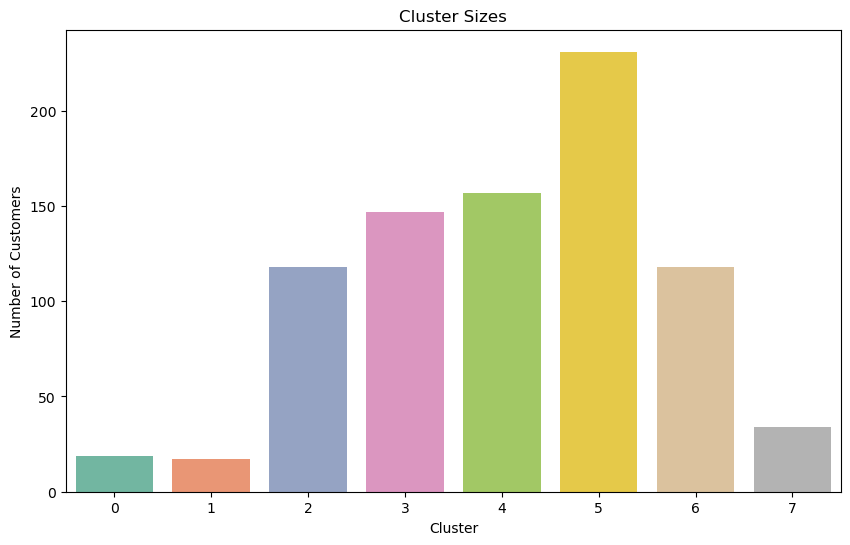

In [113]:
# Cluster size
cluster_sizes = churned_customers_features['Cluster'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
sns.barplot(x=cluster_sizes.index, y=cluster_sizes.values, palette="Set2")
plt.title('Cluster Sizes')
plt.xlabel('Cluster')
plt.ylabel('Number of Customers')
plt.show()


**Comment:** Cluster 3, 4 and 5 is the top 3 largest clusters
- Suggestions: 

    - For managing large clusters, a strategic approach is essential. **Segmenting further** is a key strategy; by identifying and analyzing smaller, distinct sub-groups within the large clusters, company can tailor the marketing and engagement efforts more effectively. This involves digging deeper into the characteristics and behaviors of these sub-segments to understand their unique needs and preferences.

    - **Personalized engagement**: Implementing targeted marketing campaigns and offering personalized recommendations can significantly improve customer satisfaction and retention. Customizing experiences based on detailed customer profiles ensures that the communications and offers are relevant and compelling, which can lead to higher engagement and reduced churn.
    
    - **Enhancing the customer experience**: Gathering feedback and making service improvements based on this data can help address issues and meet the needs of large clusters more effectively. Implementing retention strategies such as loyalty programs and exclusive incentives can also foster long-term relationships. Continuous monitoring and adjusting the strategies based on performance metrics will ensure that the approach remains effective and responsive to changing customer behaviors.

**Our suggestions for next steps:**

* We can collect more data of churned users: by collect real data or using our above supervised model to predict and use it as ground truth data for clustering model

* Business can offer the promotion for all churned users and collect results. These results can be used as features in the data for the next model.

In [81]:
# import mercury as mr
 
# # configure App properties
# app = mr.App(title="Clustering", description="Ecommerce dataset", static_notebook=True)

In [82]:
# !mercury run